In [3]:
import random
import math
import matplotlib.pyplot as plt
import time

In [4]:
def distance(p, q):
    return math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)
print(distance((3, 4), (6, 9)))

5.830951894845301


In [5]:
def centroid(points):
    x = sum(p[0] for p in points) / len(points)
    y = sum(p[1] for p in points) / len(points)
    return (x, y)
points = [(1, 2), (3, 8), (5, 6), (7, 8), (9, 10), (11, 12)]
print(centroid(points))

(6.0, 7.666666666666667)


In [6]:
def kmeans(points, k, max_iterations=100):
    centroids = random.sample(points, k)

    for i in range(max_iterations):
        clusters = [[] for i in range(k)]
        for point in points:
            distances = [distance(point, centroid) for centroid in centroids]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(centroid(cluster))
            else:
                new_centroids.append(random.choice(points))
        centroids = new_centroids

    return clusters
points = [(1, 3), (5, 7), (0, 2), (4, -1), (0, 0), (2, 6), (-3, 5), (8, -2), (-1, -3), (7, 5), (2, 0), (6, 2), (5, -3), (-2, 8), (-3, -1), (3, -1), (0, 0), (-2, 6), (5, 7), (-1, -3)]
print(kmeans(points, 3))


[[(5, 7), (2, 6), (7, 5), (6, 2), (5, 7)], [(1, 3), (0, 2), (0, 0), (-3, 5), (-1, -3), (2, 0), (-2, 8), (-3, -1), (0, 0), (-2, 6), (-1, -3)], [(4, -1), (8, -2), (5, -3), (3, -1)]]


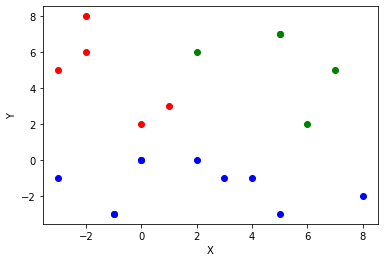

In [7]:
clusters = [[(1, 3), (0, 2), (-3, 5), (-2, 8), (-2, 6)],
            [(5, 7), (2, 6), (7, 5), (6, 2), (5, 7)],
            [(4, -1), (0, 0), (8, -2), (-1, -3), (2, 0), (5, -3), (-3, -1), (3, -1), (0, 0), (-1, -3)]]

colors = ['red', 'green', 'blue']

for i, cluster in enumerate(clusters):
    x_values = [point[0] for point in cluster]
    y_values = [point[1] for point in cluster]
    plt.scatter(x_values, y_values, color=colors[i])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [23]:
def find_closest_points(clusters):
    distances = {}
    for i, cluster_i in enumerate(clusters):
        for j in range(i+1, len(clusters)):
            cluster_j = clusters[j]
            for point_i in cluster_i:
                for point_j in cluster_j:
                    dist = round(math.sqrt((point_i[0] - point_j[0]) ** 2 + (point_i[1] - point_j[1]) ** 2),7)
                    if (point_i, point_j) not in distances and (point_j, point_i) not in distances:
                        distances[(point_i, point_j)] = dist
                        
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    return sorted_distances[0][1]

print(find_closest_points(clusters))

2.0


In [24]:
n = int(input())
points = []
for i in range(n):
    x, y = input().split()
    points.append((int(x), int(y)))
k = int(input())

12
7 6
4 3
5 1
1 7
2 7
5 7
3 3
7 8
2 8
4 4
6 7
2 6
3


In [34]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, k))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 2.8284271
time: 0.007204771041870117 seconds


In [54]:
minn = -100.0
maxx = 100.0
points = [(random.uniform(minn, maxx), random.uniform(minn, maxx)) for i in range(200)]


In [62]:
points

[(-78.16500584914348, -32.234257135155445),
 (-93.8927820026307, 51.07258289914495),
 (-10.259812538022459, -98.7086905298515),
 (91.97613870845163, -51.745329280652186),
 (87.80885362642329, -74.49058481622134),
 (-36.87475813983918, -99.79378897731239),
 (67.34143870572208, -25.16679945090408),
 (59.03241892444993, 13.785536694730212),
 (99.90706536051368, 80.36133645551345),
 (-61.52645969386343, -56.74969995534156),
 (67.01360497306894, -57.781639161122776),
 (77.6688897327696, 71.35349706667702),
 (37.69209555400752, -10.40564895482406),
 (-55.25247774487274, 72.58968294504439),
 (-55.63480927976359, 58.54505252674704),
 (4.94369765939912, -74.99611932394012),
 (-33.80944618005046, -77.32271155910213),
 (85.07673268138794, 2.091919740140952),
 (45.23608602455735, -27.304938382977355),
 (71.55833200669034, -35.32236070763912),
 (-93.47862395036486, -99.14574363349118),
 (-11.475463083809686, 77.99815152513997),
 (-47.70576754741263, -38.47950320159115),
 (-24.12981880556957, 52.314

In [70]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 199))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 0.7236211
time: 2.016969919204712 seconds


In [71]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 100))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 2.0304267
time: 1.0527679920196533 seconds


In [72]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 50))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 4.2305852
time: 0.5284171104431152 seconds


In [73]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 25))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 5.0569936
time: 0.29303789138793945 seconds


In [74]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 12))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 6.523689
time: 0.1690990924835205 seconds


In [75]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 6))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 4.8307296
time: 0.10745716094970703 seconds


In [76]:
time1 = time.time()
print(f"shortest distance is: {find_closest_points(kmeans(points, 3))}")
time2 = time.time()
print(f"time: {time2-time1} seconds")

shortest distance is: 6.4677458
time: 0.07150793075561523 seconds
